In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv('/Users/eliewahachaligha/Desktop/ML-Zoomcamp/course_homework/ml-zoomcamp-homework-2025/02-regression/CreditScoring.csv')

In [3]:
df.columns=df.columns.str.lower()

for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

In [4]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [5]:
# distribution of Price
df['price']

0        846
1       1658
2       2985
3       1325
4        910
        ... 
4450    1020
4451    1263
4452     963
4453     550
4454    1650
Name: price, Length: 4455, dtype: int64

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

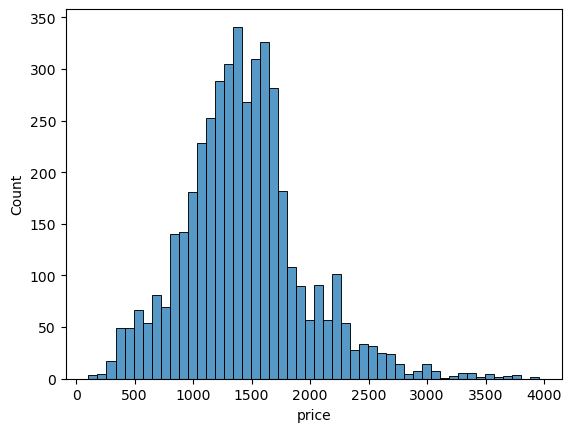

In [7]:
sns.histplot(df.price[df.price < 4000], bins=50)
plt.show()

In [8]:
np.log1p([0, 1, 10, 1000, 10000])

array([0.        , 0.69314718, 2.39789527, 6.90875478, 9.21044037])

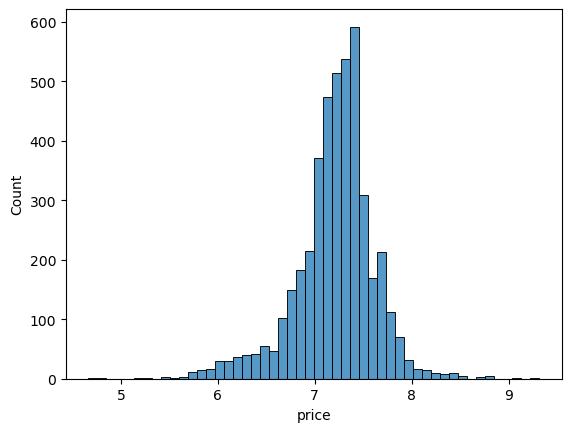

In [9]:
price_logs=np.log1p(df.price)
sns.histplot(price_logs, bins=50)
plt.show()

# Validation framework

Data Model ->Train: 60%, Validation: 20% and Test: 20%

In [10]:
n=len(df)
n

4455

In [11]:
# this approach is perfect check the  n_train
n = len(df)

n_val= int(n * 0.2)
n_test= int(n * 0.2)
n_train= n - n_val - n_test

n, n_val + n_test + n_train

(4455, 4455)

In [12]:
n, n_val, n_test, n_train

(4455, 891, 891, 2673)

In [13]:
df_train= df.iloc[n_train: ]
df_val = df.iloc[n_train: n_train + n_val]
df_test= df.iloc[n_train + n_val: ]


In [14]:
idx=np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)
idx

array([2721, 2851, 1837, ..., 2514, 3606, 2575])

In [15]:
df_train = df.iloc[idx[: n_train]]
df_val = df.iloc[idx[n_train: n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val: ]]

In [16]:
df_train.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
2721,1,0,2,48,45,2,1,2,35,110,3000,0,1200,1642
2851,1,12,2,36,34,2,1,1,60,97,4500,96,600,1253
1837,1,23,2,24,57,2,1,1,45,93,2500,0,600,1118
2082,2,3,3,30,22,1,1,3,60,99999999,5000,0,1200,1426
3595,1,4,3,60,37,2,1,3,75,120,10500,1500,1200,1341


In [17]:
y_train=np.log1p(df_train.price.values)
y_val=np.log1p(df_val.price.values)
y_test=np.log1p(df_test.price.values)

In [18]:
del df_train['price']
del df_val['price']
del df_test['price']

In [19]:
len(y_train)

2673

# Linear Regression

In [20]:
df_train.iloc[10]

status          1
seniority      10
home            3
time           60
age            55
marital         2
records         1
job             1
expenses       60
income        195
assets       4000
debt            0
amount       1900
Name: 1389, dtype: int64

In [21]:
xi= [60, 195, 4000]
w0 = 7.17
w=[0.001, 0.004, 0.002]

def linear_regression(xi):
    n= len(xi)

    pred = w0
    for j in range(n):
        pred = pred + w[j] * xi[j]
        
    return pred


In [22]:
linear_regression(xi)

16.009999999999998

In [23]:
np.expm1(16.009999999999998)

np.float64(8975416.415967343)

In [24]:
np.log1p(8975416.415967343)

np.float64(16.009999999999998)

In [25]:
df.describe

<bound method NDFrame.describe of       status  seniority  home  time  age  marital  records  job  expenses  \
0          1          9     1    60   30        2        1    3        73   
1          1         17     1    60   58        3        1    1        48   
2          2         10     2    36   46        2        2    3        90   
3          1          0     1    60   24        1        1    1        63   
4          1          0     1    36   26        1        1    1        46   
...      ...        ...   ...   ...  ...      ...      ...  ...       ...   
4450       2          1     1    60   39        2        1    1        69   
4451       1         22     2    60   46        2        1    1        60   
4452       2          0     2    24   37        2        1    2        60   
4453       1          0     1    48   23        1        1    3        49   
4454       1          5     2    60   32        2        1    3        60   

      income  assets  debt  amount  price